# **Práctica Final parte 3**

**Autores:**
- *Blanca Bueno Lucena*
- *Guillermo Navarro Meseguer*

En esta tercera parte buscamos generar aloritmos que sean capaces de predecir si habrá o no un accidente grave en caso de accidente. 

Para ello, hemos empleado los siguientes algoritmos:
- Regresión logística
- KNN
- Árbol de decisión simple
- Random Forest
- Gradient Boosting 

In [1]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import sklearn
random_state = 100
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cargamos los datos y escalamos:

In [2]:
# Conectamos el notebook a google drive donde se encuentran los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Datos_Train=pd.read_csv('/content/drive/MyDrive/Datos_train.csv')
Datos_Test=pd.read_csv('/content/drive/MyDrive/Datos_test.csv')

y_pd_loan=Datos_Train['objetivo']
y_pd_loan_test=Datos_Test['objetivo']
X_pd_loan=Datos_Train.drop('objetivo',axis=1)
X_pd_loan_test=Datos_Test.drop('objetivo',axis=1)

In [ ]:
scaler = StandardScaler().fit(X_pd_loan)
Xs_train = scaler.transform(X_pd_loan)
Xs_test  = scaler.transform(X_pd_loan_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Proporcion train:%0.3f'%np.mean(y_pd_loan))
print('Proporcion test: %0.3f'%np.mean(y_pd_loan_test))

Datos train:  (157812, 22)
Datos test:   (39454, 22)
Proporcion train:0.500
Proporcion test: 0.500


## **Regresión logística**

In [12]:
#Funciones útiles
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()
    
    
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()
    
    
def plot_recall_precission(recall_precision):

    plt.figure(figsize=(15, 5))
    ax = sns.pointplot(x = [element[0] for element in recall_precision], y=[element[1] for element in recall_precision],
                     color="r", label='recall', scale=1)
    ax = sns.pointplot(x = [element[0] for element in recall_precision], y=[element[2] for element in recall_precision],
                     color="b", label='precission')
    ax.set_title('recall-precision versus threshold')
    ax.set_xlabel('threshold')
    ax.set_ylabel('probability')

    labels = ax.get_xticklabels()
    for i,l in enumerate(labels):
        if(i%5 == 0) or (i%5 ==1) or (i%5 == 2) or (i%5 == 3):
            labels[i] = '' # skip even labels
            ax.set_xticklabels(labels, rotation=45, fontdict={'size': 10})
    plt.show()

In [ ]:
lr_default = LogisticRegression(C=1).fit(Xs_train, y_pd_loan)
y_pred_train = lr_default.predict(Xs_train)
y_pred_test = lr_default.predict(Xs_test)

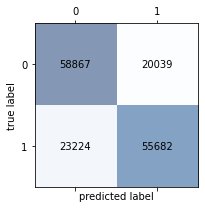

ACC:  0.7258573492510075
SEN:  0.7056751070894483
ESP:  0.7460395914125668
PPV:  0.7353574305674779
FSC:  0.7202105712456427


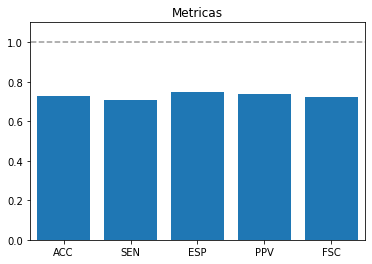

In [ ]:
# TRAIN
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_pd_loan,y_pred_train)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

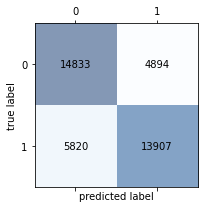

ACC:  0.7284432503675166
SEN:  0.7049728798093983
ESP:  0.751913620925635
PPV:  0.7396946970905803
FSC:  0.7219165282392026


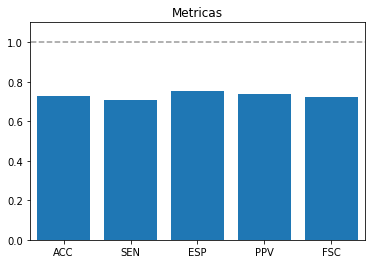

In [ ]:
# TEST 
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_pd_loan_test,y_pred_test)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

Con las lineas anteriores, lo que se busca es probar si el modelo hace overfitting.

Se puede observar que no es así, al encontrar que no hay mucha disparidad entre los valores obtenidos para train y para test. Esto, junto con las métricas obtenidas (Accuracy, Recall, Precisión y más adelante AUC), nos da a entender que es un buen estimador.

En adelante, aun a sabiendas de que sería bueno aplicar para todos los algortimos este proceso, nos limitaremos a calcular solamente las métricas para test. Dando por hecho que no debería hacer un overfitting.

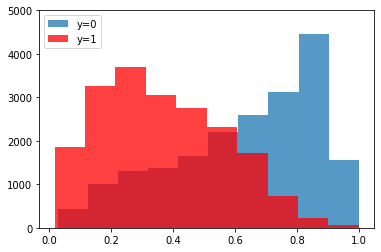

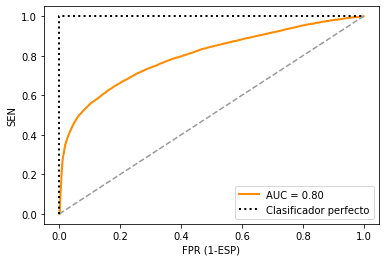

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_default = lr_default.predict_proba(Xs_test)[:,1]

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,5000)
plt.show()

ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
Accuracy=accuracy_score(y_pd_loan_test, y_pred_test)
Precision=precision_score(y_pd_loan_test, y_pred_test)
Recall=recall_score(y_pd_loan_test, y_pred_test)
APR=[Accuracy,Precision,Recall,roc_auc]
DATA1=pd.DataFrame(APR,columns=['Regresión_logistica'],index=['Accuracy','Precision','Recall','AUC'])
DATA1

,Regresión_logistica
Accuracy,0.725174
Precision,0.727888
Recall,0.719217
AUC,0.799182


## **KNN**

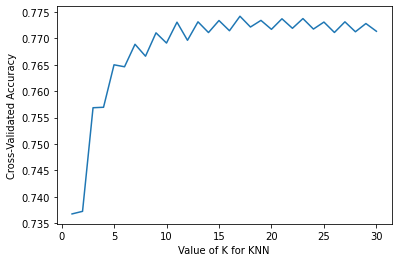

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, Xs_train, y_pd_loan, cv = 5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2)
knn.fit(Xs_train, y_pd_loan)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred = knn.predict(Xs_test) 

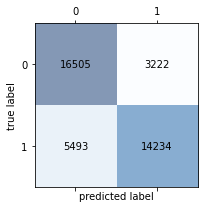

ACC:  0.7791098494449232
SEN:  0.7215491458407259
ESP:  0.8366705530491205
PPV:  0.8154216315307058
FSC:  0.7656186967162413


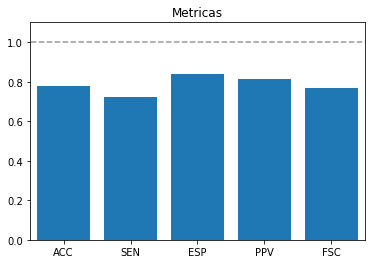

In [ ]:
confmat = confusion_matrix(y_pd_loan_test,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

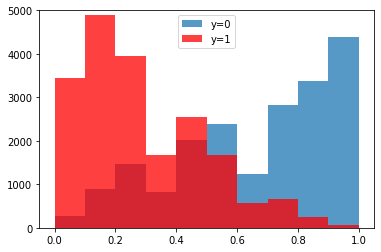

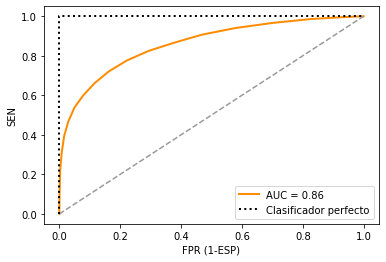

In [ ]:
y_prob_default = knn.predict_proba(Xs_test)[:,1]

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,5000)
plt.show()


ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Accuracy=accuracy_score(y_pd_loan_test, y_pred)
Precision=precision_score(y_pd_loan_test, y_pred)
Recall=recall_score(y_pd_loan_test, y_pred)
APR=[Accuracy,Precision,Recall,roc_auc]
DATA2=pd.DataFrame(APR,columns=['KNN'],index=['Accuracy','Precision','Recall','AUC'])
DATA2

,KNN
Accuracy,0.779110
Precision,0.815422
Recall,0.721549
AUC,0.859339


## **Árbol de decisión simple**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
arbol = DecisionTreeClassifier(
            max_depth         = 6,
            criterion         = 'gini')



arbol.fit(X_pd_loan, y_pd_loan)

DecisionTreeClassifier(max_depth=6)

Profundidad del árbol: 6
Número de nodos terminales: 63


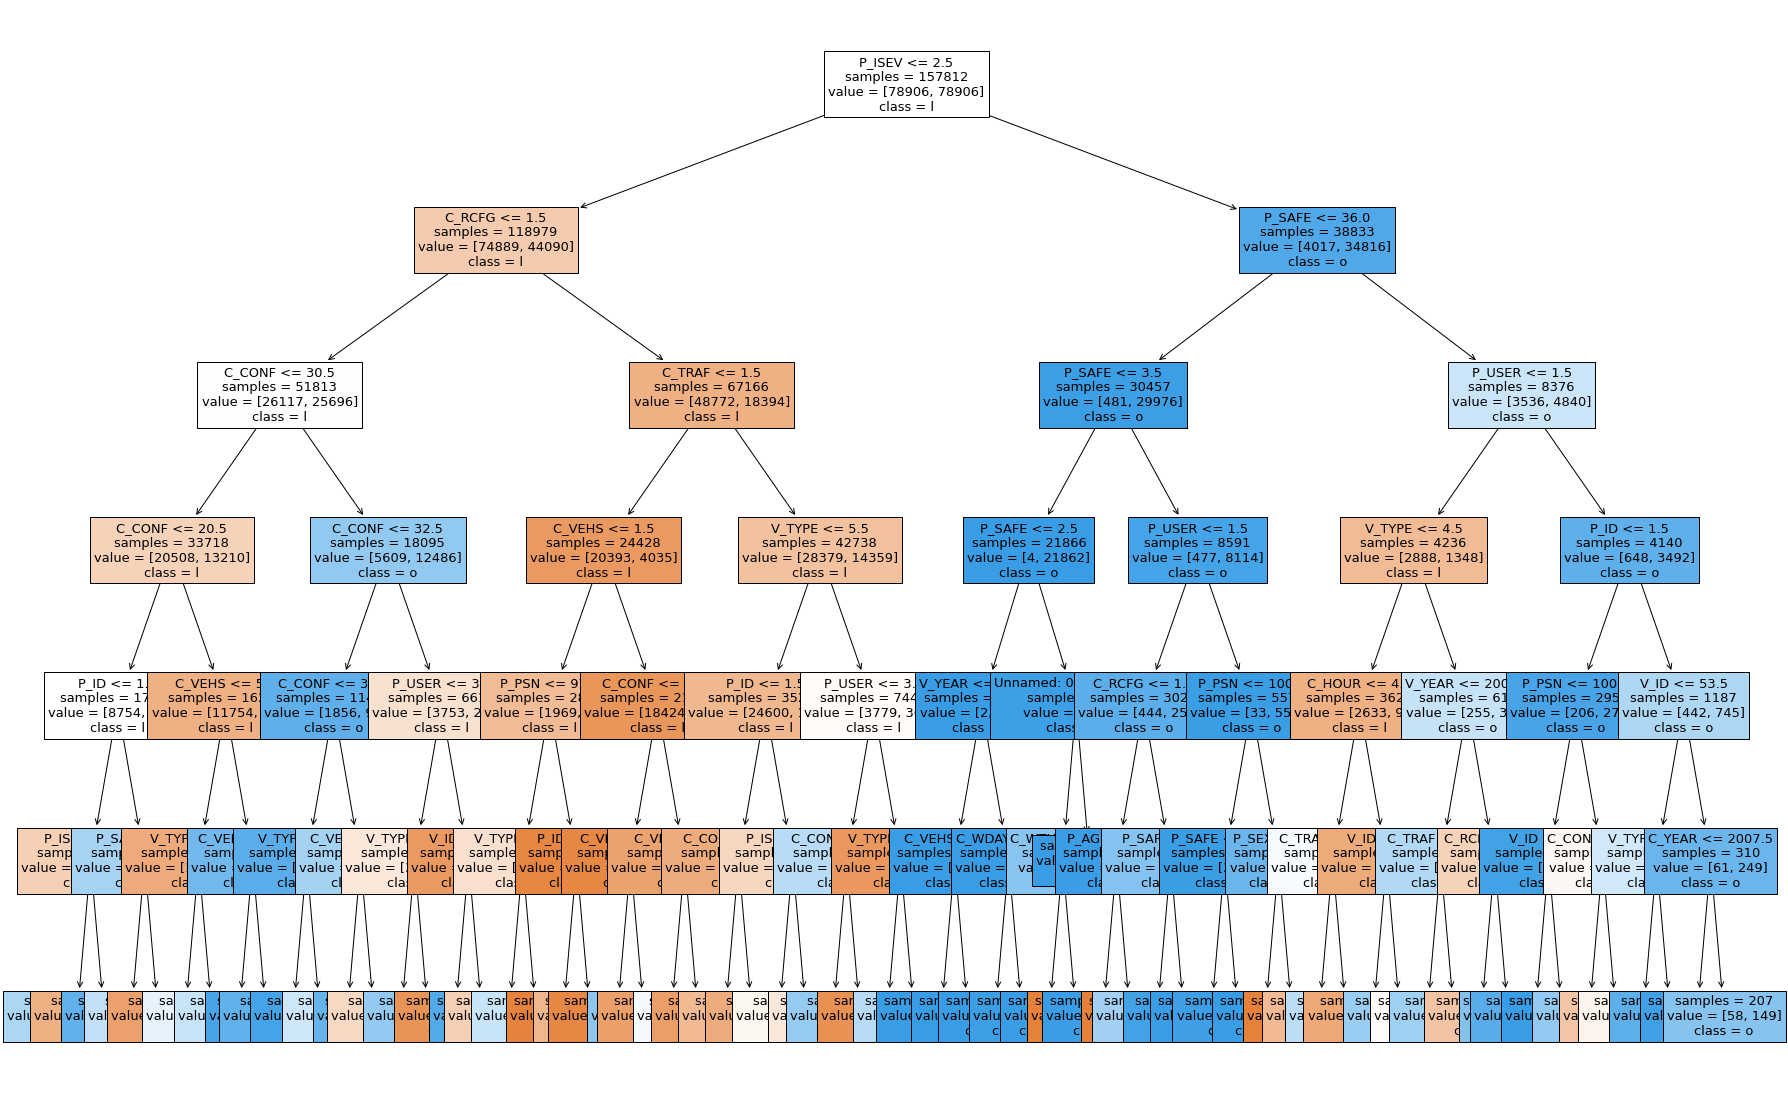

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))

print(f"Profundidad del árbol: {arbol.get_depth()}")
print(f"Número de nodos terminales: {arbol.get_n_leaves()}")

plot = plot_tree(
            decision_tree = arbol,
            feature_names = X_pd_loan.columns,
            class_names   = 'loan_status',
            filled        = True,
            impurity      = False,
            fontsize      = 13,
            ax            = ax
       )

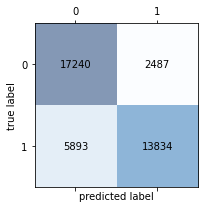

ACC:  0.7876007502407867
SEN:  0.7012723678207533
ESP:  0.8739291326608202
PPV:  0.8476196311500521
FSC:  0.767532179316467


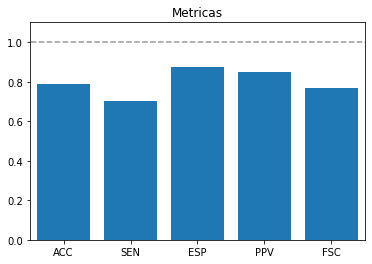

In [ ]:
predictions = arbol.predict(X_pd_loan_test)
confmat = confusion_matrix(y_pd_loan_test,predictions)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

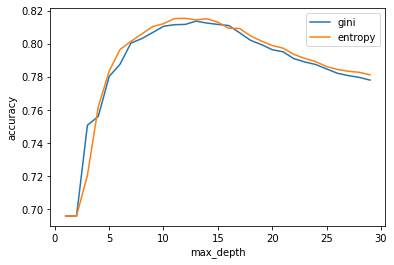

In [ ]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_pd_loan,y_pd_loan)
    pred=dtree.predict(X_pd_loan_test)
    
    acc_gini.append(accuracy_score(y_pd_loan_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(X_pd_loan,y_pd_loan)
    pred=dtree.predict(X_pd_loan_test)
    
    acc_entropy.append(accuracy_score(y_pd_loan_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
criterion=['gini','entropy']
max_depth=[1,2,3,4,5]
min_samples_split=[1,3,5,]
min_samples_leaf=[1,3,5,]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [ ]:
param=dict(criterion='criterion',max_depth='max_depth', min_samples_split='min_samples_split',min_samples_leaf='min_samples_leaf')

In [ ]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=5,verbose=20)
grid.fit(X_pd_loan,y_pd_loan)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 3, 5]},
             verbose=20)

In [ ]:
tuned_model=DecisionTreeClassifier(criterion= grid.best_params_['criterion'],
 max_depth=grid.best_params_['max_depth'],
 min_samples_leaf= grid.best_params_['min_samples_leaf'],
 min_samples_split= grid.best_params_['min_samples_split'])
tuned_model.fit(X_pd_loan,y_pd_loan)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3)

In [ ]:
tuned_model_pred=tuned_model.predict(X_pd_loan_test)

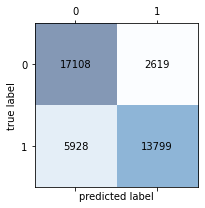

ACC:  0.7833679728291174
SEN:  0.6994981497440057
ESP:  0.8672377959142292
PPV:  0.8404799610183944
FSC:  0.7635357587494812


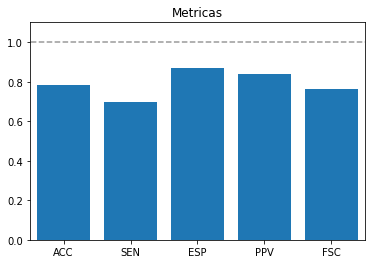

In [ ]:
confmat = confusion_matrix(y_pd_loan_test,tuned_model_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

Profundidad del árbol: 5
Número de nodos terminales: 31


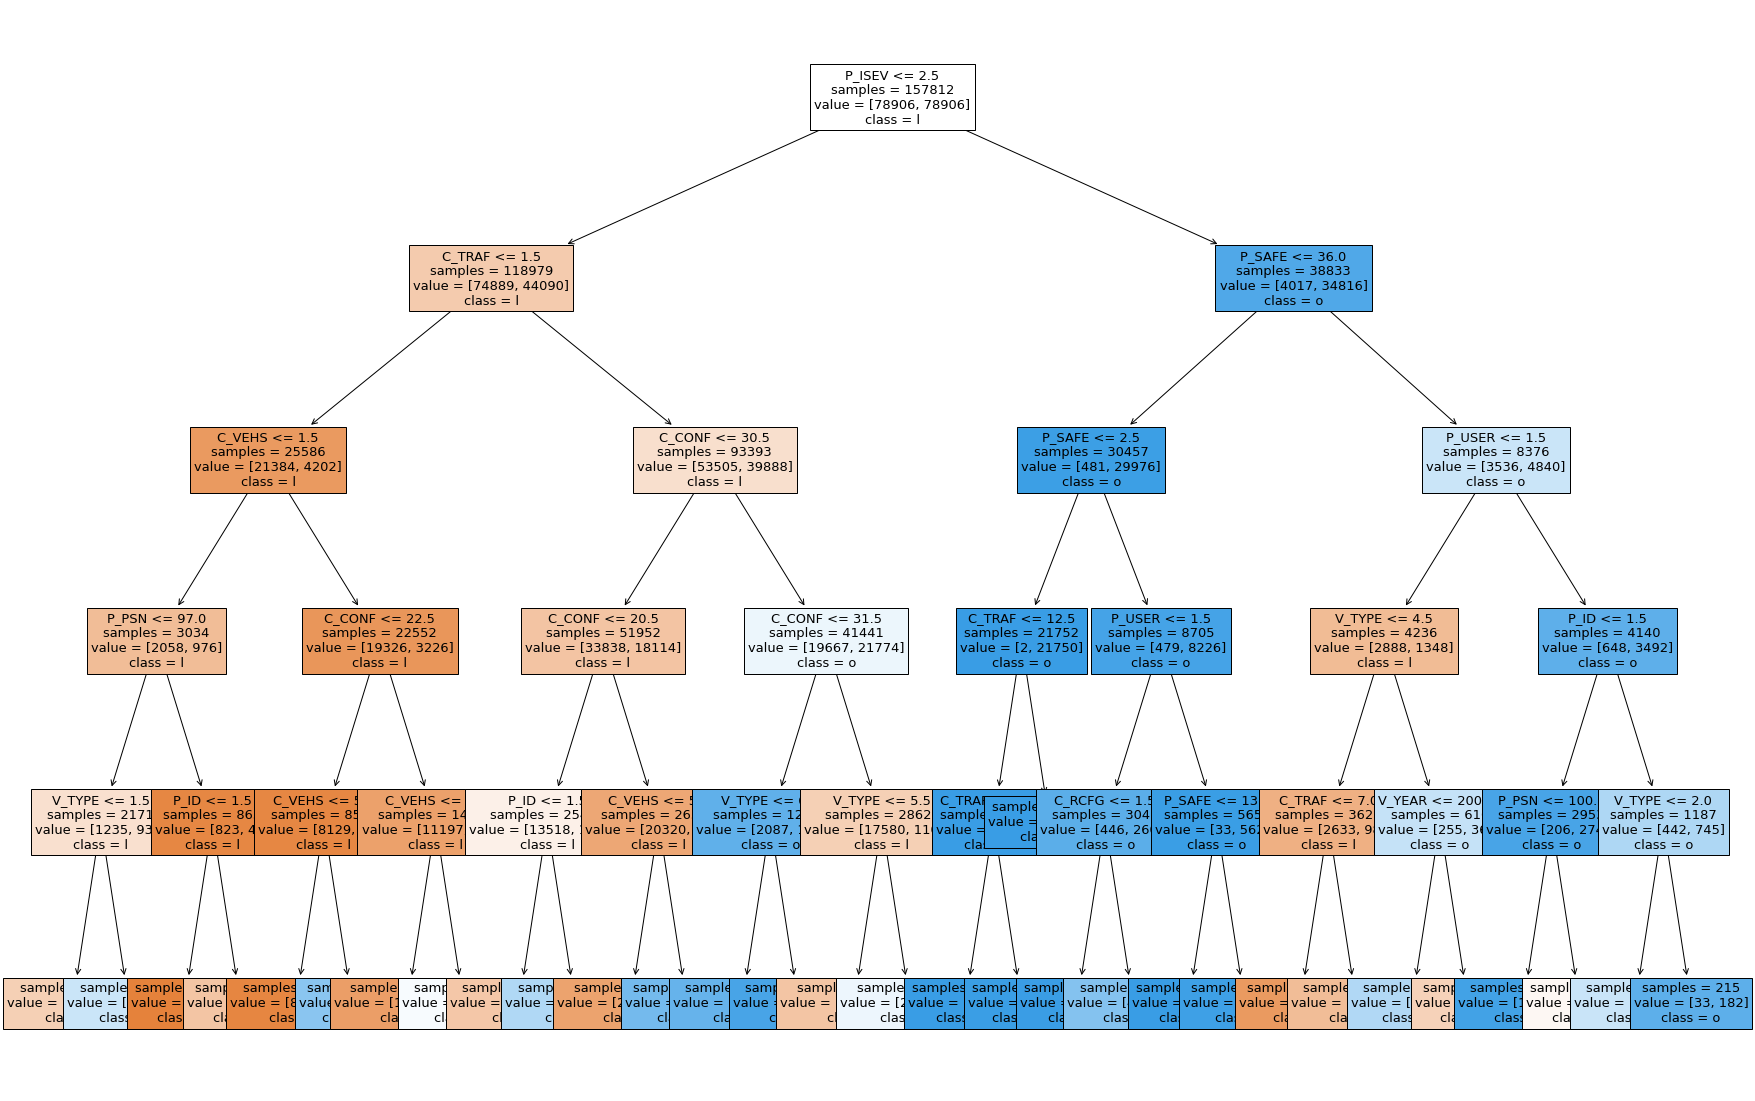

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))

print(f"Profundidad del árbol: {tuned_model.get_depth()}")
print(f"Número de nodos terminales: {tuned_model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tuned_model,
            feature_names = X_pd_loan.columns,
            class_names   = 'loan_status',
            filled        = True,
            impurity      = False,
            fontsize      = 13,
            ax            = ax
       )

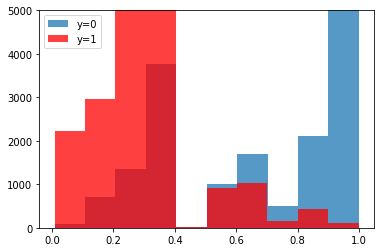

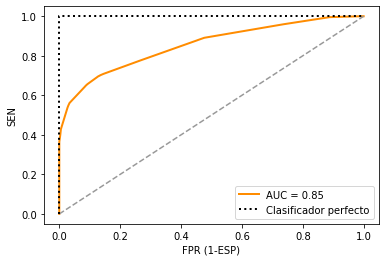

In [ ]:
y_prob_default = tuned_model.predict_proba(X_pd_loan_test)[:,1]

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,5000)
plt.show()


ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Accuracy=accuracy_score(y_pd_loan_test, tuned_model_pred)
Precision=precision_score(y_pd_loan_test, tuned_model_pred)
Recall=recall_score(y_pd_loan_test, tuned_model_pred)
APR=[Accuracy,Precision,Recall,roc_auc]
DATA3=pd.DataFrame(APR,columns=['Arbol_simple'],index=['Accuracy','Precision','Recall','AUC'])
DATA3

,Arbol_simple
Accuracy,0.783368
Precision,0.840480
Recall,0.699498
AUC,0.853718


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import multiprocessing
from sklearn.model_selection import RepeatedKFold
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [30],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_pd_loan, y = y_pd_loan)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
23,entropy,20,9,30,0.834791,0.003025,0.950852,0.000919
11,gini,20,9,30,0.834784,0.002282,0.956108,0.001132
14,entropy,None,9,30,0.834723,0.002232,0.999030,0.000094
10,gini,20,7,30,0.834542,0.002590,0.952910,0.000960


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 9, 'n_estimators': 30} : 0.8347907735313268 accuracy


In [ ]:
modelo_final = grid.best_estimator_

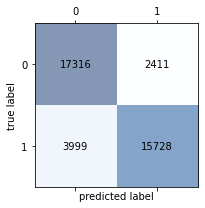

ACC:  0.8375323161149694
SEN:  0.7972829117453236
ESP:  0.877781720484615
PPV:  0.8670819780583273
FSC:  0.8307188506839909


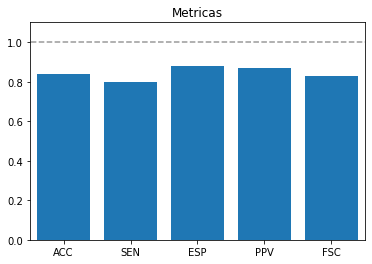

In [ ]:
predicciones = modelo_final.predict(X = X_pd_loan_test)

confmat = confusion_matrix(y_pd_loan_test,predicciones)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

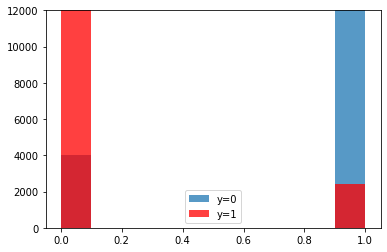

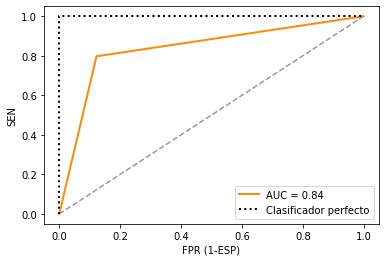

In [ ]:
y_prob_default = predicciones

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,12000)
plt.show()


ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Accuracy=accuracy_score(y_pd_loan_test,predicciones)
Precision=precision_score(y_pd_loan_test,predicciones)
Recall=recall_score(y_pd_loan_test,predicciones)
APR=[Accuracy,Precision,Recall,roc_auc]
DATA5=pd.DataFrame(APR,columns=['Random_Forest'],index=['Accuracy','Precision','Recall','AUC'])
DATA5

,Random_Forest
Accuracy,0.837532
Precision,0.867082
Recall,0.797283
AUC,0.837532


## **GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [30],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.1, 0.2, 0.5]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_pd_loan, y = y_pd_loan)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
57,0.2,20,sqrt,30,1,0.833460,0.001877,0.999962,0.000016
59,0.2,20,log2,30,1,0.833460,0.001877,0.999962,0.000016
27,0.1,20,sqrt,30,1,0.833384,0.001848,0.992792,0.000832
49,0.2,10,auto,30,1,0.833384,0.001162,0.896801,0.000906


In [ ]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.2, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 30, 'subsample': 1} : 0.8334600664081312 accuracy


In [ ]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_pd_loan_test)

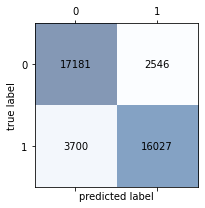

ACC:  0.8416890556090637
SEN:  0.8124398033152532
ESP:  0.8709383079028742
PPV:  0.86291929144457
FSC:  0.8369190600522193


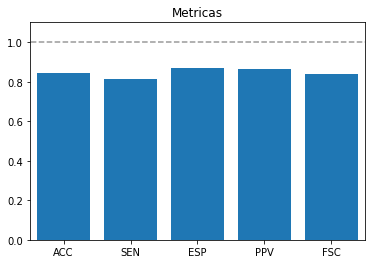

In [ ]:
confmat = confusion_matrix(y_pd_loan_test,predicciones)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

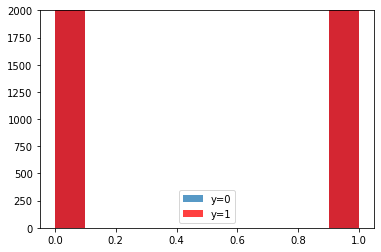

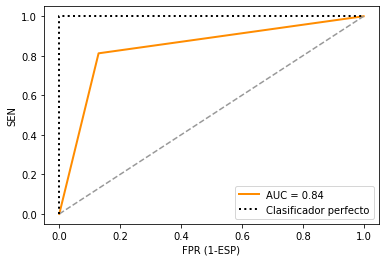

In [ ]:
y_prob_default = predicciones

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,2000)
plt.show()


ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Accuracy=accuracy_score(y_pd_loan_test,predicciones)
Precision=precision_score(y_pd_loan_test,predicciones)
Recall=recall_score(y_pd_loan_test,predicciones)

APR=[Accuracy,Precision,Recall,roc_auc]
DATA6=pd.DataFrame(APR,columns=['GradientBoost'],index=['Accuracy','Precision','Recall','AUC'])
DATA6

,GradientBoost
Accuracy,0.841689
Precision,0.862919
Recall,0.812440
AUC,0.841689


In [ ]:
DATA=pd.merge(DATA1,DATA2, left_index=True, right_index=True)
DATA=pd.merge(DATA,DATA3, left_index=True, right_index=True)
DATA=pd.merge(DATA,DATA5, left_index=True, right_index=True)
DATA=pd.merge(DATA,DATA6, left_index=True, right_index=True)

DATA.transpose().sort_values('AUC',ascending=False).style.background_gradient(cmap="Greens",axis=0, low=0.1, high=1.0)

,Accuracy,Precision,Recall,AUC
KNN,0.779110,0.815422,0.721549,0.859339
Arbol_simple,0.783368,0.840480,0.699498,0.853718
GradientBoost,0.841689,0.862919,0.812440,0.841689
Random_Forest,0.837532,0.867082,0.797283,0.837532
Regresión_logistica,0.725174,0.727888,0.719217,0.799182


## **Conclusiones tras aplicar todos los algoritmos**

Podemos observar como todos los algoritmos empleados son buenos estimadores para predecir si va a haber un accidente grave o leve.

El algortimo que mejor AUC tiene es el KNN, por otro lado, vemos que el Gradient Boosting y el Random Forest tienen muy buena accurracy, precisón y recall. Lo que nos da a entender que podríamos usar cualquiera de estos algortimos como modelo predictivo de clasificación.

Respondiendo a la pregunta planteada, pudiendo observar las distintas matrices de confusión, entendemos que los falsos negtivos y verdaderos positivos, nos dan el valor de fallecimientos reales. En este caso concreto, en caso de error, es mejor fijarnos en el Recall = vp/(vp+fn) ya que es mejor asumir más muertes de la que realmente van a haber, ya que es más perjudicial decir que alguien no va a morir y que finalmente si fallezca a decirle que es probable que fallezca y finalmente sobreviva. 


Los verdaderos negativos y falsos positivos, son los que usarán tratamiento médico, ya que en caso de fallecimiento no serán necesarios. De todas formas, se debe entender que hay accidentes leves donde no es necesario ningún servicio de atención medica. Por tanto, en la cuarta y última parte lo que trataremos es de aplicar estos algoritmos a una nueva variable objetivo que tenga dentro de los accidentes leves si necesita atención médica (1) o si no hace falta (0)

# **Parte 4: Ampliación**

### **Nueva variable objetivo: P_ISEV**

In [ ]:
Datos_Train=pd.read_csv('/content/drive/MyDrive/Datos_train.csv')
Datos_Test=pd.read_csv('/content/drive/MyDrive/Datos_test.csv')

Datos_Train=Datos_Train[Datos_Train['objetivo']==0]
Datos_Test=Datos_Test[Datos_Test['objetivo']==0]

Datos_Train.P_ISEV.value_counts()

2    42414
1    36470
3       22
Name: P_ISEV, dtype: int64

Observamos que con esta nueva variable objetivo los datos sí estan balanceados.

In [ ]:
import plotly.express as px
fig = px.histogram(Datos_Train, x=Datos_Train['P_ISEV'])
fig.show()

Sustituimos los valores correspondientes a accidente sin daños o con fallecimiento, es decir, que no necesita atención médica (1 y 3 = 1) el resto los sustituimos por el valor 0.

In [ ]:
Datos_Train['P_ISEV']=Datos_Train['P_ISEV'].replace(2,0)
Datos_Train['P_ISEV']=Datos_Train['P_ISEV'].replace(3,1)

Datos_Test['P_ISEV']=Datos_Test['P_ISEV'].replace(2,0)
Datos_Test['P_ISEV']=Datos_Test['P_ISEV'].replace(3,1)

In [ ]:
y_pd_loan=Datos_Train['P_ISEV']
y_pd_loan_test=Datos_Test['P_ISEV']
X_pd_loan=Datos_Train.drop('P_ISEV',axis=1)
X_pd_loan_test=Datos_Test.drop('P_ISEV',axis=1)

In [ ]:
#Estandarizamos los datos
scaler = StandardScaler().fit(X_pd_loan)
Xs_train = scaler.transform(X_pd_loan)
Xs_test  = scaler.transform(X_pd_loan_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Proporcion train:%0.3f'%np.mean(y_pd_loan))
print('Proporcion test: %0.3f'%np.mean(y_pd_loan_test))

Datos train:  (78906, 22)
Datos test:   (19727, 22)
Proporcion train:0.462
Proporcion test: 1.535


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import multiprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [25],
              'max_features': [5,6, 7],
              'max_depth'   : [None, 3, 10, 15],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_pd_loan, y = y_pd_loan)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
23,entropy,15,7,25,0.720271,0.002717,0.790094,0.002206
22,entropy,15,6,25,0.720152,0.002869,0.789394,0.002146
21,entropy,15,5,25,0.719793,0.002514,0.786231,0.001604
10,gini,15,6,25,0.719388,0.002555,0.797838,0.001657


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 7, 'n_estimators': 25} : 0.720270500729913 accuracy


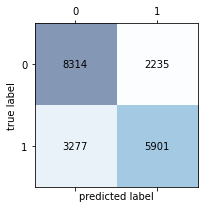

ACC:  0.7205859988847773
SEN:  0.642950533885378
ESP:  0.7881315764527443
PPV:  0.7252949852507374
FSC:  0.6816449116322052


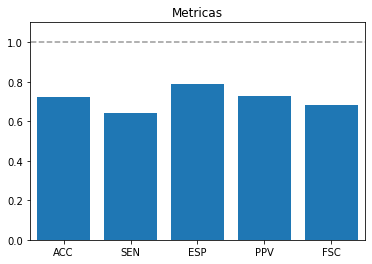

In [ ]:
modelo_final = grid.best_estimator_

predicciones = modelo_final.predict(X = X_pd_loan_test)

confmat = confusion_matrix(y_pd_loan_test,predicciones)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

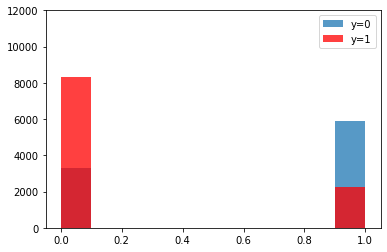

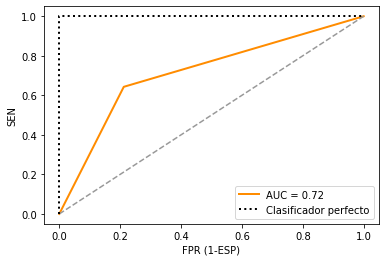

In [ ]:
y_prob_default = predicciones

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,12000)
plt.show()


ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

### **Regresión logísitica**

In [ ]:
lr_default = LogisticRegression(C=1).fit(Xs_train, y_pd_loan)
y_pred_train = lr_default.predict(Xs_train)
y_pred_test = lr_default.predict(Xs_test)

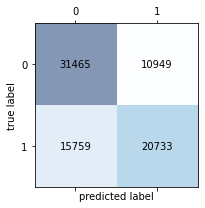

ACC:  0.6615213038298735
SEN:  0.5681519237093061
ESP:  0.7418541047767246
PPV:  0.654409443848242
FSC:  0.6082377445947135


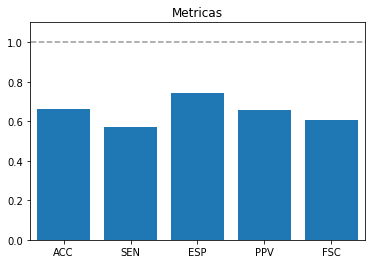

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_pd_loan,y_pred_train)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

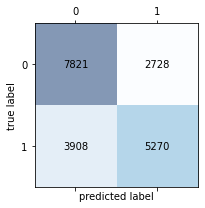

ACC:  0.6636082526486541
SEN:  0.574199171932883
ESP:  0.7413972888425443
PPV:  0.6589147286821705
FSC:  0.6136469492314858


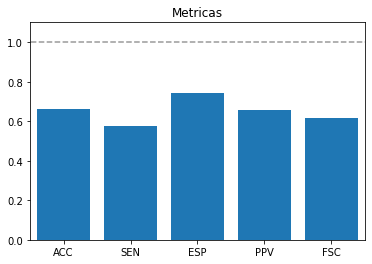

In [ ]:
# TEST 
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_pd_loan_test,y_pred_test)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

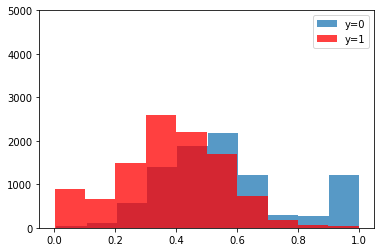

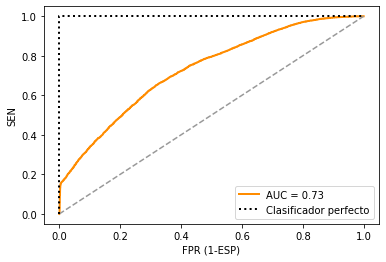

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_default = lr_default.predict_proba(Xs_test)[:,1]

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,5000)
plt.show()

ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

### **Conclusiones**

Habiendo cambiado la variable objetivo a si el accidente necesitará de atención médica o no. Hemos podido comprobar a través del Random Forest y de la Regresión Logística, que las aseguradoras sí podría clasificar en función de esta variable. Pudiendo optimizar así los recursos económicos destinados a cada cliente.

### **Nueva variable objetivo 2.0: V_TYPE**

In [4]:
Datos_Train=pd.read_csv('/content/drive/MyDrive/Datos_train.csv')
Datos_Test=pd.read_csv('/content/drive/MyDrive/Datos_test.csv')

datos=pd.concat([Datos_Train,Datos_Test])

In [5]:

z=datos.V_TYPE.unique().tolist()
z.remove(1)
datos.V_TYPE=datos.V_TYPE.replace(z,0)

In [6]:
datos.V_TYPE.value_counts()

1    150390
0     46876
Name: V_TYPE, dtype: int64

In [7]:
datos=pd.concat([datos[datos['V_TYPE']==1].sample(46876),datos[datos['V_TYPE']==0].sample(46876)])

In [8]:
X_pd_loan, X_pd_loan_test, y_pd_loan, y_pd_loan_test = train_test_split(datos.drop('V_TYPE',axis=1), 
                                                                     datos['V_TYPE'], 
                                                                     stratify=datos['V_TYPE'], 
                                                                     test_size=0.2)

In [9]:
#Estandarizamos los datos
scaler = StandardScaler().fit(X_pd_loan)
Xs_train = scaler.transform(X_pd_loan)
Xs_test  = scaler.transform(X_pd_loan_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Proporcion train:%0.3f'%np.mean(y_pd_loan))
print('Proporcion test: %0.3f'%np.mean(y_pd_loan_test))

Datos train:  (75001, 22)
Datos test:   (18751, 22)
Proporcion train:0.500
Proporcion test: 0.500


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import multiprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [25],
              'max_features': [5,6, 7],
              'max_depth'   : [None, 3, 10, 15],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_pd_loan, y = y_pd_loan)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
12,entropy,None,5,25,0.820536,0.003310,0.998828,0.000131
10,gini,15,6,25,0.820127,0.003671,0.890471,0.001478
23,entropy,15,7,25,0.819998,0.002874,0.884278,0.001148
22,entropy,15,6,25,0.819909,0.003075,0.883653,0.001035


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 25} : 0.8205357879845049 accuracy


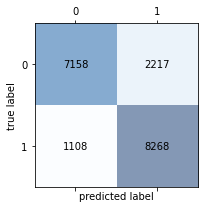

ACC:  0.8226761239400565
SEN:  0.8818259385665529
ESP:  0.76352
PPV:  0.788555078683834
FSC:  0.8325864760082574


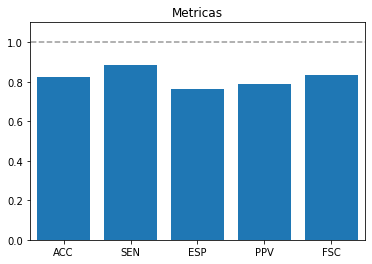

In [ ]:
modelo_final = grid.best_estimator_

predicciones = modelo_final.predict(X = X_pd_loan_test)

confmat = confusion_matrix(y_pd_loan_test,predicciones)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

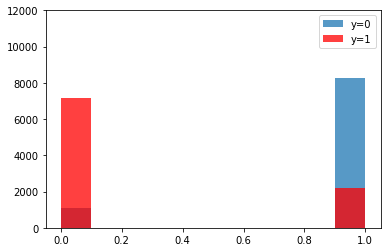

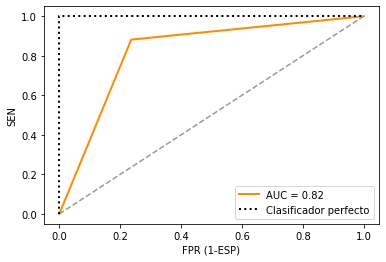

In [ ]:
y_prob_default = predicciones

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,12000)
plt.show()


ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

### **Regresión logísitica**

In [10]:
lr_default = LogisticRegression(C=1).fit(Xs_train, y_pd_loan)
y_pred_train = lr_default.predict(Xs_train)
y_pred_test = lr_default.predict(Xs_test)

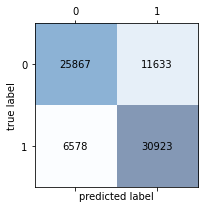

ACC:  0.7571899041346115
SEN:  0.8245913442308205
ESP:  0.6897866666666667
PPV:  0.7266425415922549
FSC:  0.7725245762394295


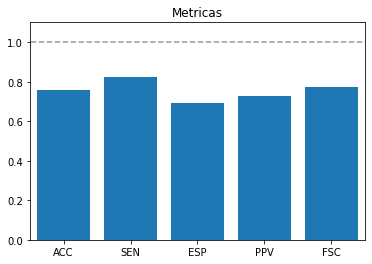

In [13]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_pd_loan,y_pred_train)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

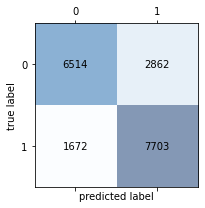

ACC:  0.7581995626899899
SEN:  0.8216533333333333
ESP:  0.6947525597269625
PPV:  0.7291055371509702
FSC:  0.772617853560682


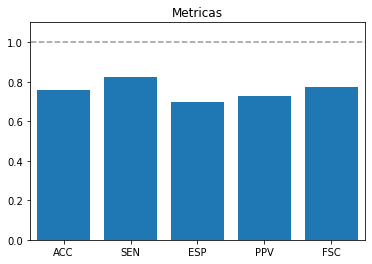

In [14]:
# TEST 
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_pd_loan_test,y_pred_test)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

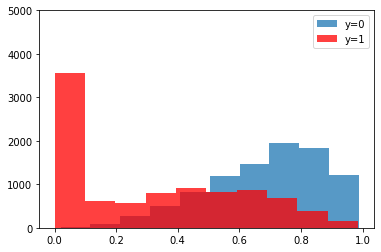

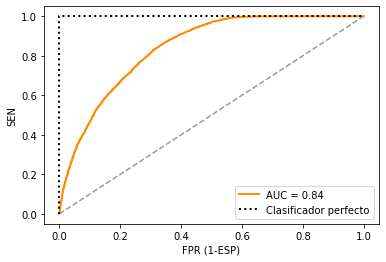

In [15]:
from sklearn.metrics import roc_curve, auc

y_prob_default = lr_default.predict_proba(Xs_test)[:,1]

idx_0 = (y_pd_loan_test==1)
idx_1 = (y_pd_loan_test==0)

# your code here 
plt.hist(y_prob_default[idx_0],density=0, alpha=0.75,label='y=0')
plt.hist(y_prob_default[idx_1],density=0, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.ylim(0,5000)
plt.show()

ejex, ejey, _ = roc_curve(y_pd_loan_test, y_prob_default)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

### **Conclusiones**

De esta forma comprobamos como podemos clasificar en función del tipo de vehículo, distinguiendo así entre si el vehículo que ha tenido el accidente se trata de un vehículo ligero (Turismos, furgonetas, vehículos utilitarios ligeros y camionetas ligeras) o cualquier otro tipo de vehículo.